In [1]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from collections import Counter
from collections import OrderedDict
import statistics as stat
import numpy as np
import random
import mahotas
from scipy.stats import skew
from scipy.stats import kurtosis
from numpy import var
train_list = pd.read_csv("AOI_train.csv")
train_list 

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5
...,...,...
1495,train_01495.png,4
1496,train_01496.png,3
1497,train_01497.png,1
1498,train_01498.png,1


image shape: (512, 512, 3)
data type: uint8
min: 109, max: 255


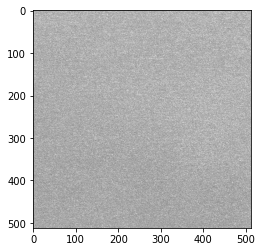

In [2]:
data_path="C:/Users/justin/Desktop/Automated Optical Inspection/AOI/Train_Image"
img = cv2.imread(os.path.join(data_path, train_list.loc[0, "ID"]))
print(f"image shape: {img.shape}")
print(f"data type: {img.dtype}")
print(f"min: {img.min()}, max: {img.max()}")
plt.imshow(img)
plt.show()

In [3]:
normal_list = train_list[train_list["Label"]==0]["ID"].values
void_list = train_list[train_list["Label"]==1]["ID"].values
horizontal_defect_list = train_list[train_list["Label"]==2]["ID"].values
vertical_defect_list = train_list[train_list["Label"]==3]["ID"].values
edge_defect_list = train_list[train_list["Label"]==4]["ID"].values
particle_list = train_list[train_list["Label"]==5]["ID"].values
label=[normal_list,void_list,horizontal_defect_list,vertical_defect_list,edge_defect_list,particle_list]
ordered_label = OrderedDict(sorted(Counter(train_list["Label"]).items()))
ordered_label=dict(ordered_label)
ordered_label

{0: 395, 1: 303, 2: 58, 3: 227, 4: 146, 5: 371}

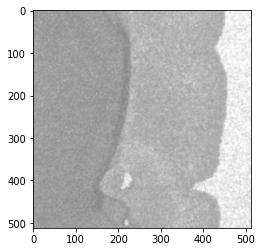

In [4]:
img = cv2.imread(os.path.join(data_path, label[4][100]))
plt.imshow(img)
plt.show()

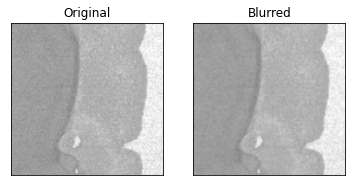

In [5]:
blur = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
img_haralick_mean={"0":[],"1":[],"2":[],"3":[],"4":[],"5":[],}
img_haralick_var={"0":[],"1":[],"2":[],"3":[],"4":[],"5":[],}
img_haralick_skew={"0":[],"1":[],"2":[],"3":[],"4":[],"5":[],}
img_haralick_kur={"0":[],"1":[],"2":[],"3":[],"4":[],"5":[],}
for i in range(len(label[0])):
    img = cv2.imread(os.path.join(data_path, label[0][i]))
    img =cv2.medianBlur(img,5)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_haralick_mean["0"].append(mahotas.features.haralick(gray).mean(axis=0))
    img_haralick_var["0"].append(mahotas.features.haralick(gray).var(axis=0))
    img_haralick_skew["0"].append(skew(mahotas.features.haralick(gray),axis=0))
    img_haralick_kur["0"].append(kurtosis(mahotas.features.haralick(gray),axis=0))
print(len(img_haralick_mean["0"]))

for i in range(len(label[1])):
    img = cv2.imread(os.path.join(data_path, label[1][i]))
    img =cv2.medianBlur(img,5)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_haralick_mean["1"].append(mahotas.features.haralick(gray).mean(axis=0))
    img_haralick_var["1"].append(mahotas.features.haralick(gray).var(axis=0))
    img_haralick_skew["1"].append(skew(mahotas.features.haralick(gray),axis=0))
    img_haralick_kur["1"].append(kurtosis(mahotas.features.haralick(gray),axis=0))
print(len(img_haralick_mean["1"]))

for i in range(len(label[2])):
    img = cv2.imread(os.path.join(data_path, label[2][i]))
    img =cv2.medianBlur(img,5)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_haralick_mean["2"].append(mahotas.features.haralick(gray).mean(axis=0))
    img_haralick_var["2"].append(mahotas.features.haralick(gray).var(axis=0))
    img_haralick_skew["2"].append(skew(mahotas.features.haralick(gray),axis=0))
    img_haralick_kur["2"].append(kurtosis(mahotas.features.haralick(gray),axis=0))
print(len(img_haralick_mean["2"]))

for i in range(len(label[3])):
    img = cv2.imread(os.path.join(data_path, label[3][i]))
    img =cv2.medianBlur(img,5)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_haralick_mean["3"].append(mahotas.features.haralick(gray).mean(axis=0))
    img_haralick_var["3"].append(mahotas.features.haralick(gray).var(axis=0))
    img_haralick_skew["3"].append(skew(mahotas.features.haralick(gray),axis=0))
    img_haralick_kur["3"].append(kurtosis(mahotas.features.haralick(gray),axis=0))
print(len(img_haralick_mean["3"]))

for i in range(len(label[4])):
    img = cv2.imread(os.path.join(data_path, label[4][i]))
    img =cv2.medianBlur(img,5)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_haralick_mean["4"].append(mahotas.features.haralick(gray).mean(axis=0))
    img_haralick_var["4"].append(mahotas.features.haralick(gray).var(axis=0))
    img_haralick_skew["4"].append(skew(mahotas.features.haralick(gray),axis=0))
    img_haralick_kur["4"].append(kurtosis(mahotas.features.haralick(gray),axis=0))
print(len(img_haralick_mean["4"]))

for i in range(len(label[5])):
    img = cv2.imread(os.path.join(data_path, label[5][i]))
    img =cv2.medianBlur(img,5)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_haralick_mean["5"].append(mahotas.features.haralick(gray).mean(axis=0))
    img_haralick_var["5"].append(mahotas.features.haralick(gray).var(axis=0))
    img_haralick_skew["5"].append(skew(mahotas.features.haralick(gray),axis=0))
    img_haralick_kur["5"].append(kurtosis(mahotas.features.haralick(gray),axis=0))
print(len(img_haralick_mean["5"]))

395
303
58
227
146
371


In [7]:
print(img_haralick_mean["5"][0])
print(type(list(img_haralick_mean["5"][0])))
len(img_haralick_mean)

[ 2.44277455e-03  4.54993125e+00  9.96638766e-01  6.76828461e+02
  4.63352477e-01  4.13943541e+02  2.70276391e+03  7.57756679e+00
  9.59539763e+00  8.81714388e-04  2.33046256e+00 -5.46579687e-01
  9.99590869e-01]
<class 'list'>


6

In [8]:
import csv
header=[]
label={"0":(ordered_label[0])*[0],"1":(ordered_label[1])*[1],"2":(ordered_label[2])*[2],"3":(ordered_label[3])*[3],"4":(ordered_label[4])*[4],"5":(ordered_label[5])*[5]}
for i in range(52):
    header.append(f"X{i}")  
header.append("Label")
with open('haralick_median blur.csv', 'w', newline='') as csvfile:
    # 建立 CSV 檔寫入器
    writer = csv.writer(csvfile)
    writer.writerow(header)
    for i in range(len(img_haralick_mean)):
        for j in range(len(img_haralick_mean[f"{i}"])):
            temp=list(img_haralick_mean[f"{i}"][j])
            temp.extend(list(img_haralick_var[f"{i}"][j]))
            temp.extend(list(img_haralick_skew[f"{i}"][j]))
            temp.extend(list(img_haralick_kur[f"{i}"][j]))
            temp.append(label[f"{i}"][j])
            writer.writerow(np.array(temp))


